In [3]:
%pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Change this to your actual dataset path
DATA_DIR = "datasets/leapgestrecog" # Folder must contain subfolders per class (e.g., 'class1/', 'class2/', etc.)

IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
EPOCHS = 10


In [5]:
# Data preprocessing with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [7]:
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)


Epoch 1/10
500/500 [==============================] - 420s 838ms/step - loss: 0.2803 - accuracy: 0.9060 - val_loss: 2.0946 - val_accuracy: 0.6977
Epoch 2/10
500/500 [==============================] - 56s 113ms/step - loss: 0.0313 - accuracy: 0.9862 - val_loss: 2.3281 - val_accuracy: 0.6925
Epoch 3/10
500/500 [==============================] - 56s 112ms/step - loss: 0.0263 - accuracy: 0.9869 - val_loss: 2.9750 - val_accuracy: 0.6895
Epoch 4/10
500/500 [==============================] - 57s 114ms/step - loss: 0.0263 - accuracy: 0.9866 - val_loss: 2.2481 - val_accuracy: 0.7665
Epoch 5/10
500/500 [==============================] - 71s 141ms/step - loss: 0.0215 - accuracy: 0.9887 - val_loss: 2.2612 - val_accuracy: 0.7485
Epoch 6/10
500/500 [==============================] - 116s 232ms/step - loss: 0.0204 - accuracy: 0.9883 - val_loss: 1.8306 - val_accuracy: 0.7803
Epoch 7/10
500/500 [==============================] - 80s 160ms/step - loss: 0.0186 - accuracy: 0.9898 - val_loss: 1.9654 - val_

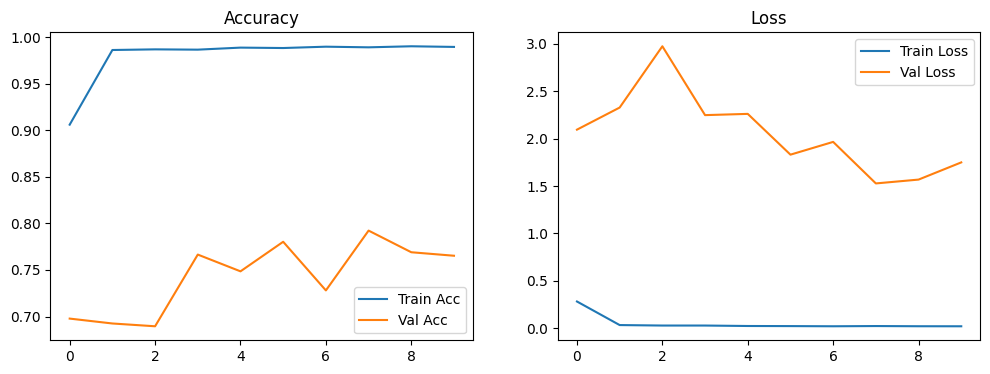

In [8]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


125/125 [==============================] - 9s 72ms/step
Classification Report:

              precision    recall  f1-score   support

          00       0.09      0.09      0.09       400
          01       0.08      0.08      0.08       400
          02       0.09      0.09      0.09       400
          03       0.09      0.09      0.09       400
          04       0.09      0.05      0.07       400
          05       0.13      0.14      0.14       400
          06       0.11      0.24      0.15       400
          07       0.11      0.04      0.06       400
          08       0.00      0.00      0.00       400
          09       0.08      0.14      0.10       400

    accuracy                           0.10      4000
   macro avg       0.09      0.10      0.08      4000
weighted avg       0.09      0.10      0.08      4000



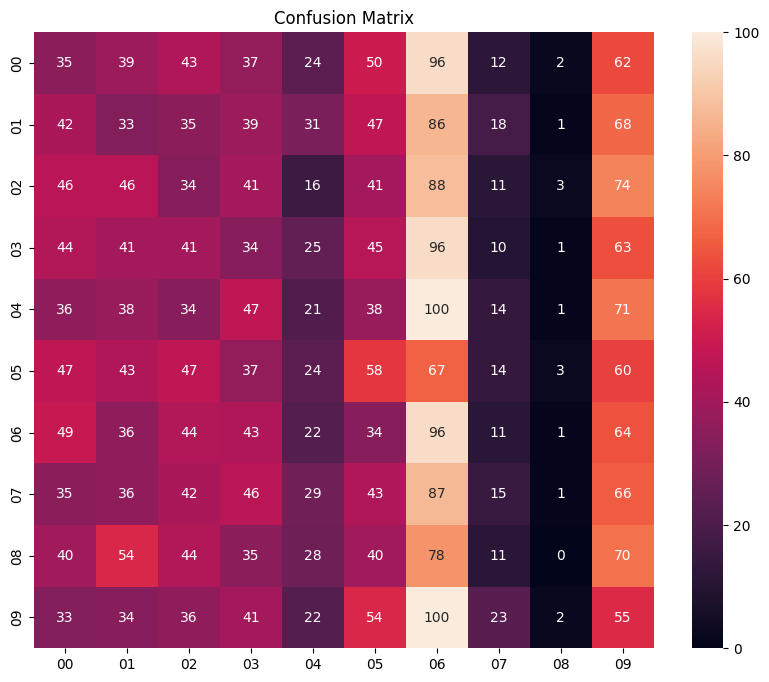

In [9]:
val_gen.reset()
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)

# Report
print("Classification Report:\n")
print(classification_report(val_gen.classes, y_pred, target_names=list(val_gen.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(val_gen.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=val_gen.class_indices,
            yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.show()


In [10]:
os.makedirs("model", exist_ok=True)
model.save("model/gesture_model.h5")
print("✅ Model saved to model/gesture_model.h5")


✅ Model saved to model/gesture_model.h5


c:\Users\SUJITH_KATTA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
